# K-Nearest Neighbors (KNN)

### É proposto a solução de um simples problema de classificação utilizando o algoritmo KNN. Para esse problema é utilizado uma simples base de dados gerada manualmente.

### Bibliotecas a serem utilizadas

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

### Algoritmo K-Nearest Neighbors

In [21]:
# Função para implementação do algoritmo
def k_nearest_neighbors(data, predict, k=3):
    # Wraning caso o valor de k não seja coerente
    if len(data) >= k:
        warnings.warn('k is set to a value less than total voting objects!')
    distances = [] # Lista para armazenar valores de distância entre o dado de predição e todos os dados de treino
    # Cálculo das distâncias Euclideanas entre o dado de predição e todos os dados de treino
    for group in data:
        for feature in data[group]:
            euclidean_distance = np.linalg.norm(np.array(feature) - np.array(predict)) # Cálculo de distância Euclideana
            distances.append([euclidean_distance, group])
    # Computação dos votos dos k dados mais próximos do dado de predição
    votes = [object[1] for object in sorted(distances)[:k]]
    # Classe resultante da votação
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

### Main()

### Dados

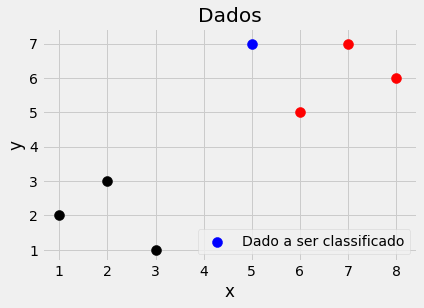

In [24]:
# Geração dos dados a serem utilizados
dataset = {'k': [[1, 2],[2, 3],[3, 1]], 'r':[[6, 5], [7, 7], [8, 6]]} # Base de dados com duas classes ('k' e 'r') e 6 pontos
new_features = [5, 7] # Dado a ser classificado pelo algoritmo

# Plotando os dados 
for classe in dataset:
    for point in dataset[classe]:
        plt.scatter(point[0], point[1], s=100, c=classe)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados')
# Em uma linha: [[plt.scatter(point[0], point[1], s=100, c=classe) for point in dataset[classe]] for classe in dataset]

# Plotando dado a ser classificado
plt.scatter(new_features[0], new_features[1], s=100, c='b', label = 'Dado a ser classificado')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Classificação do dado

The class of the new featrure is r.


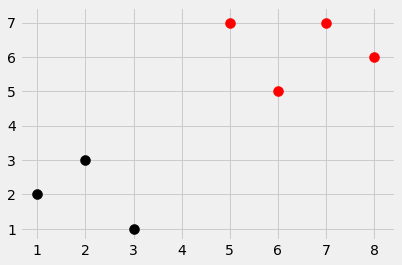

In [25]:
# Aplicação do algoritmo para dado a ser classificado
result = k_nearest_neighbors(dataset, new_features)

# Plotando o resultado
print(f'The class of the new featrure is {result}.')
for classe in dataset:
    for point in dataset[classe]:
        plt.scatter(point[0], point[1], s=100, c=classe)

# Plotando o dado classificado
plt.scatter(new_features[0], new_features[1], s=100, c=result)
plt.show()